In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [65]:
all_data = pd.read_csv('all_data.csv')

In [66]:
all_data['GDP in billion'] = all_data['GDP'] / 1e9

In [67]:
print(all_data.info())
print(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
 4   GDP in billion                    96 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ KB
None
  Country  Year  Life expectancy at birth (years)           GDP  \
0   Chile  2000                              77.3  7.786093e+10   
1   Chile  2001                              77.3  7.097992e+10   
2   Chile  2002                              77.8  6.973681e+10   
3   Chile  2003                              77.9  7.564346e+10   
4   Chile  2004                              78.0  9.92

In [68]:
print(all_data.describe())

              Year  Life expectancy at birth (years)           GDP  \
count    96.000000                         96.000000  9.600000e+01   
mean   2007.500000                         72.789583  3.880499e+12   
std       4.633971                         10.672882  5.197561e+12   
min    2000.000000                         44.300000  4.415703e+09   
25%    2003.750000                         74.475000  1.733018e+11   
50%    2007.500000                         76.750000  1.280220e+12   
75%    2011.250000                         78.900000  4.067510e+12   
max    2015.000000                         81.000000  1.810000e+13   

       GDP in billion  
count       96.000000  
mean      3880.498571  
std       5197.561311  
min          4.415703  
25%        173.301750  
50%       1280.220000  
75%       4067.510000  
max      18100.000000  


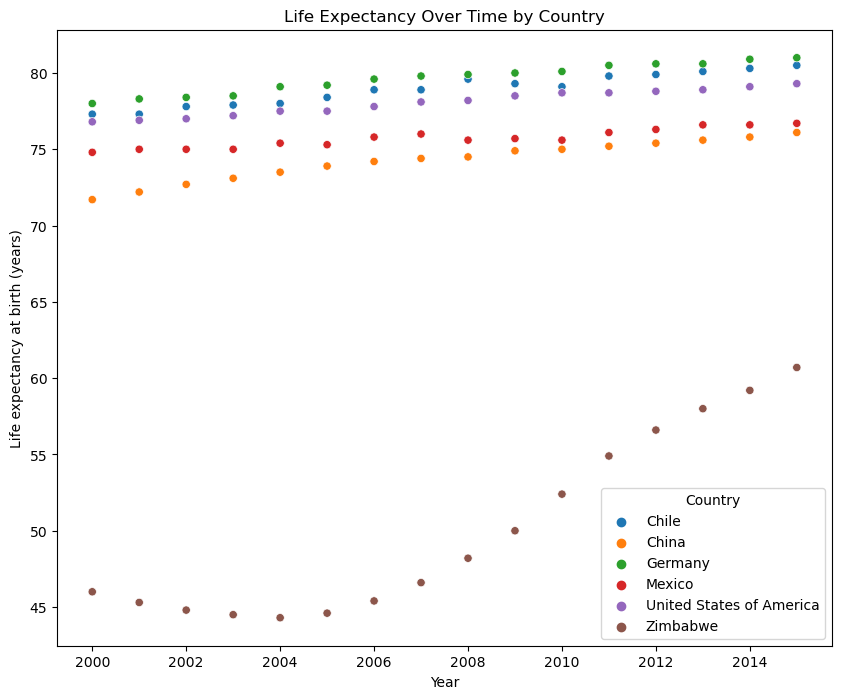

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Year', y='Life expectancy at birth (years)', hue='Country', data = all_data)
plt.title('Life Expectancy Over Time by Country')
plt.show()
plt.clf()

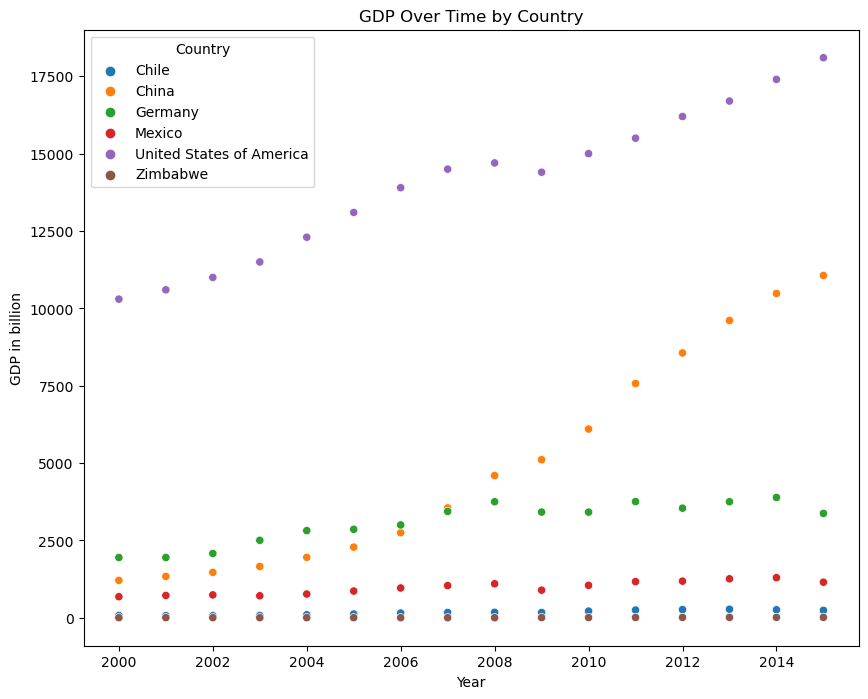

<Figure size 640x480 with 0 Axes>

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Year', y='GDP in billion', hue='Country', data = all_data)
plt.title('GDP Over Time by Country')
plt.show()
plt.clf()

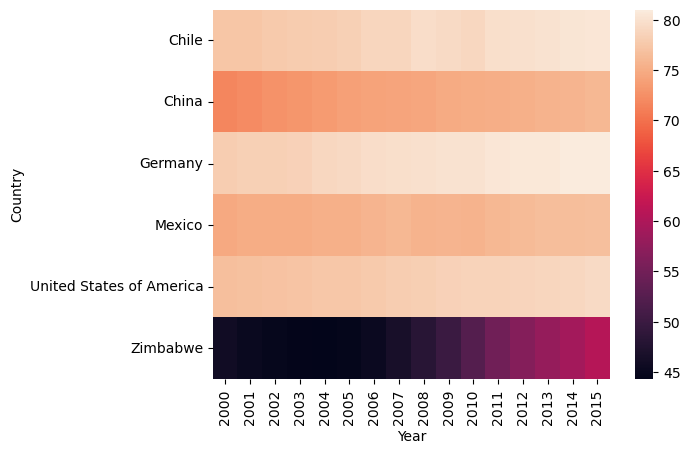

In [54]:
import seaborn as sns

# Create a pivot table with 'Country' as index, 'Year' as columns, and 'Life expectancy at birth (years)' as values
pivot_table = all_data.pivot(index='Country', columns='Year', values='Life expectancy at birth (years)')

# Create a heatmap from the pivot table
sns.heatmap(pivot_table)

# Show the plot
plt.show()


<Figure size 1000x800 with 0 Axes>

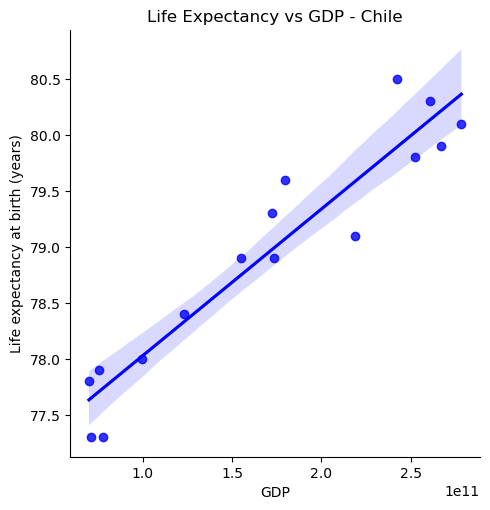

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'GDP', y='Life expectancy at birth (years)', data = all_data[all_data['Country'] == 'Chile'], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
plt.title('Life Expectancy vs GDP - Chile')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

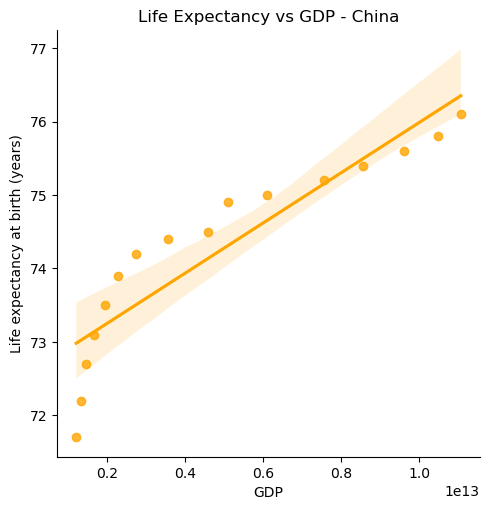

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'GDP', y='Life expectancy at birth (years)', data = all_data[all_data['Country'] == 'China'], scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'})
plt.title('Life Expectancy vs GDP - China')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

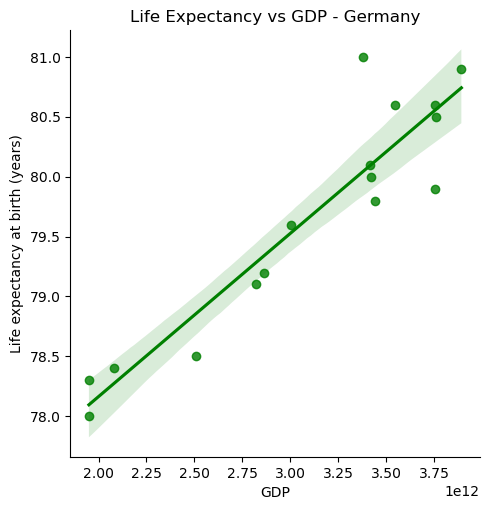

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'GDP', y='Life expectancy at birth (years)', data = all_data[all_data['Country'] == 'Germany'], scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
plt.title('Life Expectancy vs GDP - Germany')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

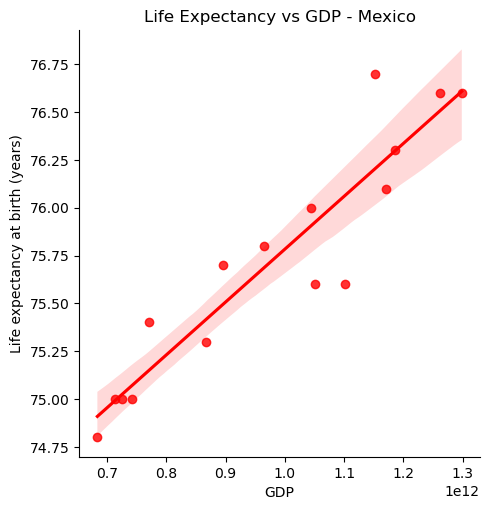

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'GDP', y='Life expectancy at birth (years)', data = all_data[all_data['Country'] == 'Mexico'], scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
plt.title('Life Expectancy vs GDP - Mexico')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

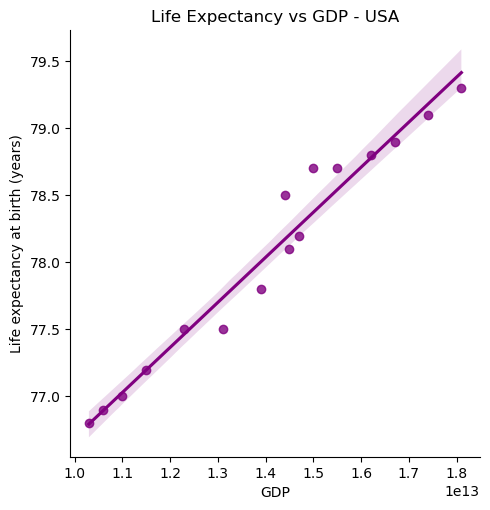

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'GDP', y='Life expectancy at birth (years)', data = all_data[all_data['Country'] == 'United States of America'], scatter_kws={'color': 'purple'}, line_kws={'color': 'purple'})
plt.title('Life Expectancy vs GDP - USA')
plt.show()
plt.clf()

<Figure size 1000x800 with 0 Axes>

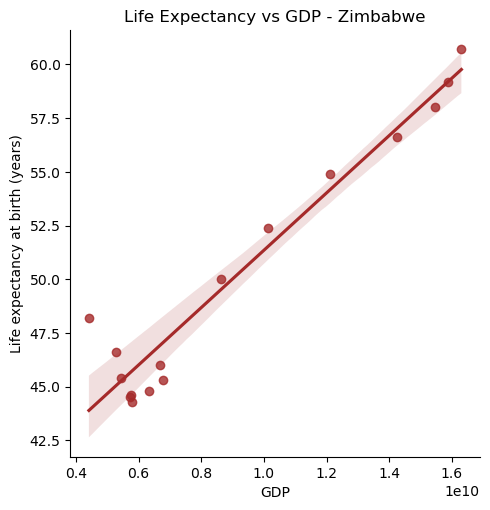

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'GDP', y='Life expectancy at birth (years)', data = all_data[all_data['Country'] == 'Zimbabwe'], scatter_kws={'color': 'brown'}, line_kws={'color': 'brown'})
plt.title('Life Expectancy vs GDP - Zimbabwe')
plt.show()
plt.clf()

In [105]:
#determining each countries correlation between gdp and life expectancy
country_data = {}
for country in all_data['Country'].unique():
    country_data[country] = all_data[all_data['Country'] == country]

correlations = {}
for country, data in country_data.items():
    correlation = data['GDP'].corr(data['Life expectancy at birth (years)'])
    correlations[country] = correlation

print(correlations)

{'Chile': 0.9498766659254417, 'China': 0.9085255408648356, 'Germany': 0.9326988982561274, 'Mexico': 0.9322377167847082, 'United States of America': 0.9817092382430256, 'Zimbabwe': 0.9661998955858779}


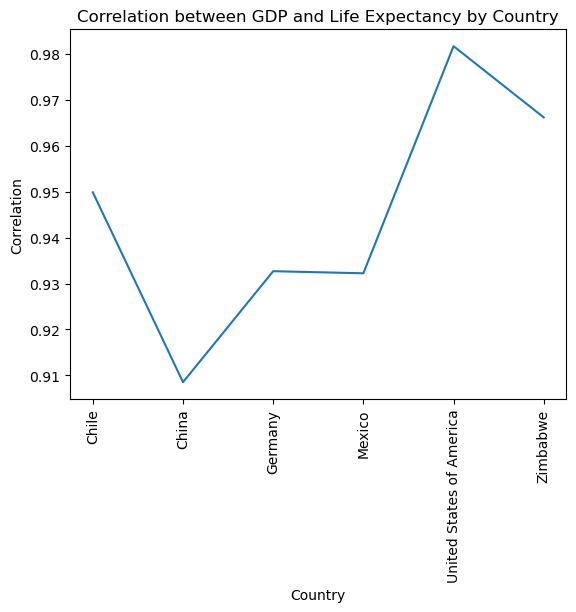

In [107]:
# Convert the dictionary to a pandas Series
correlations_series = pd.Series(correlations)

# Sort the Series by index (country names)
correlations_series = correlations_series.sort_index()

# Create a line plot
correlations_series.plot(kind='line')

# Add labels
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between GDP and Life Expectancy by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()
